# Capstone Project Notebook
This notebook will be mainly used for the Capstone project of Coursera's IBM data science course

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto

In [4]:
!pip install lxml


     |████████████████████████████████| 5.8MB 30.4MB/s eta 0:00:01


### Scrap the wikipedia page with the table of postal codes and transform the data into a pandas dataframe



In [5]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
df1 = df[0]
df1

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


### Rename column Postcode into PostalCode

In [6]:
df1.rename(columns = {"Postcode":"PostalCode"},inplace=True)


In [7]:
df1


,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
...,...,...,...
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West
285,M8Z,Etobicoke,South of Bloor


### Ignore cells with a borough that is Not assigned

In [8]:
df1 = df1[df1["Borough"] != "Not assigned"]
df1

,PostalCode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
...,...,...,...
281,M8Z,Etobicoke,Kingsway Park South West
282,M8Z,Etobicoke,Mimico NW
283,M8Z,Etobicoke,The Queensway West
284,M8Z,Etobicoke,Royal York South West


### For postal codes with several neighboorhoods, rows will be combined into one row with the neighborhoods separated with a comma

In [9]:
df2 = df1.groupby(['PostalCode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()
df2

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ..."


### If a cell has a borough but a Not assigned neighbourhood, then the neighbourhood will be the same as the borough

In [10]:
df2["Neighbourhood"]=df2["Neighbourhood"].replace("Not assigned", df2["Borough"])

In [11]:
df2

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ..."


### number of rows of the dataframe

In [12]:
df2.shape

(103, 3)

### Use geopy

In [13]:
!pip install geopy

from geopy.geocoders import Nominatim


     |████████████████████████████████| 102kB 5.7MB/s ta 0:00:011


In [14]:

address = 'Toronto, CA'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude)
print(longitude)

43.653963
-79.387207


Geopy does not work correctly for the extraction the coordinates for all the postal codes. Therefore, I have to use the csv file out of the assignment text.


In [15]:
df_coordinates = pd.read_csv("http://cocl.us/Geospatial_data")
df_coordinates


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [16]:
df_coordinates = df_coordinates.rename({'Postal Code':'PostalCode'}, axis=1)
df_final = df2.merge(df_coordinates)
df_final

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437


## Create a map of Toronto with neighbourhoods superimposed on top.

In [17]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forge


In [18]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(df_final['Latitude'], df_final['Longitude'], df_final['Borough'], df_final['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Define Foursquare Credentials and Version

In [19]:
CLIENT_ID = 'R0I5FDP03JA1NS0AJSYISIAI0JURADPGEESDATISZU2Q24T0' # your Foursquare ID
CLIENT_SECRET = 'NZ03PRZXM1EEOALDGI0PJTACOG4ZNYGTSWCVXQPADBNUREYY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R0I5FDP03JA1NS0AJSYISIAI0JURADPGEESDATISZU2Q24T0
CLIENT_SECRET:NZ03PRZXM1EEOALDGI0PJTACOG4ZNYGTSWCVXQPADBNUREYY


# Explore neighborhoods in Toronto

### Create a dataframe with the top venues for ech neighborhood

In [20]:
!pip install requests
import requests

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,  CLIENT_SECRET,  VERSION,  lat,  lng,  radius,  LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],  v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [22]:

LIMIT = 100
toronto_venues = getNearbyVenues(names=df_final['Neighbourhood'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude']
                                  )


Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [23]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Images Salon & Spa,43.802283,-79.198565,Spa
1,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.802008,-79.198080,Fast Food Restaurant
2,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
3,"Rouge, Malvern",43.806686,-79.194353,Caribbean Wave,43.798558,-79.195777,Caribbean Restaurant
4,"Rouge, Malvern",43.806686,-79.194353,Staples Morningside,43.800285,-79.196607,Paper / Office Supplies Store


In [24]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,43,43,43,43,43,43
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",32,32,32,32,32,32
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",19,19,19,19,19,19
"Alderwood, Long Branch",26,26,26,26,26,26
...,...,...,...,...,...,...
Willowdale West,13,13,13,13,13,13
Woburn,9,9,9,9,9,9
"Woodbine Gardens, Parkview Hill",20,20,20,20,20,20


## Analyze each neighborhood

In [25]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot.insert(0, "neighborhood", toronto_venues["Neighborhood"], True)

In [26]:
toronto_onehot.head()

,neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
toronto_grouped = toronto_onehot.groupby(['neighborhood']).mean().reset_index()
toronto_grouped

,neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,"Adelaide, King, Richmond",0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.0
1,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.000000,0.023256,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
4,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Willowdale West,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
97,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
98,"Woodbine Gardens, Parkview Hill",0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
99,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.032258,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0


In [28]:
toronto_grouped.shape

(101, 334)

In [29]:
num_top_venues = 6

for hood in toronto_grouped['neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
            venue  freq
0            Café  0.06
1     Coffee Shop  0.06
2           Hotel  0.05
3         Theater  0.04
4  Cosmetics Shop  0.03
5  Clothing Store  0.02


----Agincourt----
                  venue  freq
0    Chinese Restaurant  0.16
1         Shopping Mall  0.05
2                Bakery  0.05
3        Sandwich Place  0.05
4  Caribbean Restaurant  0.05
5      Malay Restaurant  0.02


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                  venue  freq
0    Chinese Restaurant  0.22
1                  Park  0.06
2                Bakery  0.06
3           Pizza Place  0.06
4             BBQ Joint  0.06
5  Fast Food Restaurant  0.06


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                        venue  freq
0                 Pizza Place  0.16
1               Grocery Store  0.16
2  Construction & Landscaping  0.05
3              Hardware Stor

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = toronto_grouped['neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Hotel,Theater,Cosmetics Shop,Movie Theater,Pizza Place,Sushi Restaurant,Restaurant,Gastropub
1,Agincourt,Chinese Restaurant,Shopping Mall,Sandwich Place,Bakery,Caribbean Restaurant,Convenience Store,Sushi Restaurant,Indian Restaurant,Dim Sum Restaurant,Mediterranean Restaurant
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,BBQ Joint,Park,Coffee Shop,Event Space,Malay Restaurant,Food Court
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Pizza Place,Grocery Store,Discount Store,Beer Store,Park,Liquor Store,Japanese Restaurant,Caribbean Restaurant,Pharmacy,Sandwich Place
4,"Alderwood, Long Branch",Discount Store,Pharmacy,Pizza Place,Convenience Store,Coffee Shop,Gas Station,Liquor Store,Trail,Skating Rink,Park


## Cluster neighborhoods

In [32]:
from sklearn.cluster import KMeans

In [33]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt  

In [34]:
toronto_grouped_clustering = toronto_grouped.drop('neighborhood', 1)

### Find best k using the Elbow method

In [35]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(toronto_grouped_clustering) 
    kmeanModel.fit(toronto_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / toronto_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(toronto_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / toronto_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

### Using the different values of Distortion

In [36]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.20398026880995856
2 : 0.1977662706865959
3 : 0.18762171825494242
4 : 0.18332828980252752
5 : 0.18020198625741649
6 : 0.1741422465106196
7 : 0.1694536744836686
8 : 0.16527166181483918
9 : 0.1609499580028518
10 : 0.16148695760305867
11 : 0.15539342133880324
12 : 0.15311077468603043
13 : 0.14940279493424358
14 : 0.1473677189854659
15 : 0.1457243893565264
16 : 0.14085500857509148
17 : 0.13861359297092318
18 : 0.13785719595581156
19 : 0.13400355642476916


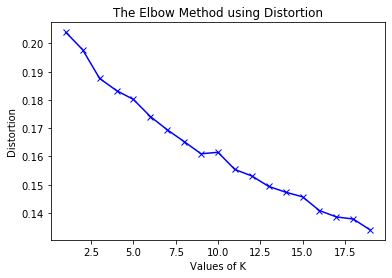

In [37]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

### Using the different values of Inertia

In [38]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 5.260741604058373
2 : 4.717267147840776
3 : 4.372545589899628
4 : 4.027401472696672
5 : 3.8588635539302127
6 : 3.5957381403774114
7 : 3.3593354618871496
8 : 3.2313249590731643
9 : 3.0831851905702536
10 : 3.0447369385555354
11 : 2.8880713200462855
12 : 2.7814677363414946
13 : 2.702509589466032
14 : 2.652451709881312
15 : 2.582015700344557
16 : 2.490091014617941
17 : 2.4187080953804596
18 : 2.3643360591121008
19 : 2.278039327371058


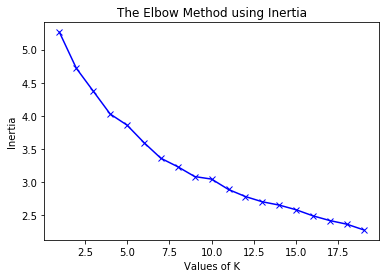

In [39]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

### Find best k using the Silhouette method

In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [41]:
for k in K:
    clusterer = KMeans(n_clusters=k +1, random_state=10)
    cluster_labels = clusterer.fit_predict(toronto_grouped_clustering)
    sample_silhouette_values = silhouette_samples(toronto_grouped_clustering, cluster_labels, metric='euclidean')
    silhouette_avg = silhouette_score(toronto_grouped_clustering, cluster_labels)
    print(k+1)
    print(silhouette_avg)

2
0.623480624528117
3
0.5561090513186249
4
0.12316156651057981
5
0.12505420542505533
6
0.12916671465867077
7
0.11418065434875058
8
0.09231392489418801
9
0.025005822756808575
10
0.09923960632794195
11
0.03096491162215578
12
0.022028141725497087
13
0.004499666237705047
14
0.010713392676105321
15
0.001705166771495877
16
0.008636285119944303
17
0.06642941461238543
18
0.045596324449155595
19
0.02626088814619258
20
0.021265508326554945


### Run k-means to cluster the neighborhood into 6 clusters.

In [42]:
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 5, 5, 5, 5, 5, 5, 1, 1, 1], dtype=int32)

In [43]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_final

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index("neighborhood"), on="Neighbourhood",how = "right")

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,2,Fast Food Restaurant,Trail,Coffee Shop,Hobby Shop,Gym,Bus Station,Business Service,Fruit & Vegetable Store,Caribbean Restaurant,Sandwich Place
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,4,Breakfast Spot,Playground,Italian Restaurant,Burger Joint,Park,Zoo,Ethiopian Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,5,Pizza Place,Fast Food Restaurant,Coffee Shop,Bank,Sandwich Place,Burger Joint,Salon / Barbershop,Fried Chicken Joint,Juice Bar,Supermarket
3,M1G,Scarborough,Woburn,43.770992,-79.216917,5,Park,Coffee Shop,Pharmacy,Mobile Phone Shop,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Empanada Restaurant,Donut Shop,Dry Cleaner
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,5,Bakery,Coffee Shop,Pharmacy,Gas Station,Indian Restaurant,Sporting Goods Shop,Athletics & Sports,Bus Line,Pizza Place,Music Store


In [44]:
toronto_merged.dropna()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,2,Fast Food Restaurant,Trail,Coffee Shop,Hobby Shop,Gym,Bus Station,Business Service,Fruit & Vegetable Store,Caribbean Restaurant,Sandwich Place
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,4,Breakfast Spot,Playground,Italian Restaurant,Burger Joint,Park,Zoo,Ethiopian Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,5,Pizza Place,Fast Food Restaurant,Coffee Shop,Bank,Sandwich Place,Burger Joint,Salon / Barbershop,Fried Chicken Joint,Juice Bar,Supermarket
3,M1G,Scarborough,Woburn,43.770992,-79.216917,5,Park,Coffee Shop,Pharmacy,Mobile Phone Shop,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Empanada Restaurant,Donut Shop,Dry Cleaner
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,5,Bakery,Coffee Shop,Pharmacy,Gas Station,Indian Restaurant,Sporting Goods Shop,Athletics & Sports,Bus Line,Pizza Place,Music Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188,5,Pizza Place,Coffee Shop,Train Station,Breakfast Spot,Park,Middle Eastern Restaurant,Soccer Field,Skating Rink,Café,Fried Chicken Joint
99,M9P,Etobicoke,Westmount,43.696319,-79.532242,5,Pizza Place,Gas Station,Middle Eastern Restaurant,Golf Driving Range,Park,Breakfast Spot,Discount Store,Sandwich Place,Flea Market,Intersection
100,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,5,Pharmacy,Pizza Place,Intersection,Bus Line,Mobile Phone Shop,Supermarket,Supplement Shop,Shopping Mall,Beer Store,Sandwich Place
101,M9V,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",43.739416,-79.588437,5,Pizza Place,Grocery Store,Discount Store,Beer Store,Park,Liquor Store,Japanese Restaurant,Caribbean Restaurant,Pharmacy,Sandwich Place


In [45]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


## Examine clusters

Cluster 1

In [47]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
102,Etobicoke,Dog Run,Coffee Shop,Lounge,Filipino Restaurant,Field,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School


This neighbourhood includes very different venues, from a farm to an event space 

Cluster 2

In [48]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Scarborough,Fast Food Restaurant,Thai Restaurant,Convenience Store,College Stadium,Diner,Café,Dessert Shop,Gym Pool,General Entertainment,Gym
18,North York,Clothing Store,Coffee Shop,Juice Bar,Bakery,Fast Food Restaurant,Japanese Restaurant,Sandwich Place,Chocolate Shop,Theater,Thai Restaurant
21,North York,Korean Restaurant,Café,Pizza Place,Coffee Shop,Middle Eastern Restaurant,Diner,Fried Chicken Joint,Indian Restaurant,Dessert Shop,Japanese Restaurant
22,North York,Coffee Shop,Bubble Tea Shop,Ramen Restaurant,Pizza Place,Korean Restaurant,Japanese Restaurant,Sandwich Place,Fast Food Restaurant,Sushi Restaurant,Café
23,North York,Park,Coffee Shop,Restaurant,Pet Store,Intersection,Dog Run,Grocery Store,French Restaurant,Dentist's Office,Bank
26,North York,Coffee Shop,Japanese Restaurant,Burger Joint,Pizza Place,Bar,Asian Restaurant,Salad Place,Basketball Court,Supermarket,Baseball Field
27,North York,Coffee Shop,Restaurant,Gym,Supermarket,Japanese Restaurant,Asian Restaurant,American Restaurant,Beer Store,Chinese Restaurant,Bar
30,North York,Coffee Shop,Turkish Restaurant,Chinese Restaurant,Soccer Field,Pizza Place,Liquor Store,Café,Food Court,Electronics Store,Latin American Restaurant
34,North York,Coffee Shop,Park,Grocery Store,French Restaurant,Café,Intersection,Lounge,Golf Course,Boxing Gym,Portuguese Restaurant
37,East Toronto,Pub,Pizza Place,Coffee Shop,Beach,Japanese Restaurant,Breakfast Spot,Bar,Tea Room,Gastropub,Park


These neighbourhoods are family-friendly, including parks, zoos, schools, playgrounds and pools as well as different restaurants

Cluster 3

In [49]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,Fast Food Restaurant,Trail,Coffee Shop,Hobby Shop,Gym,Bus Station,Business Service,Fruit & Vegetable Store,Caribbean Restaurant,Sandwich Place
5,Scarborough,Fast Food Restaurant,Train Station,Convenience Store,Pizza Place,Bowling Alley,Sandwich Place,Coffee Shop,Japanese Restaurant,Restaurant,Grocery Store
10,Scarborough,Coffee Shop,Fast Food Restaurant,Furniture / Home Store,Electronics Store,Chinese Restaurant,Automotive Shop,Bakery,Asian Restaurant,Indian Restaurant,Pharmacy
29,North York,Pizza Place,Furniture / Home Store,Coffee Shop,Sports Bar,Chinese Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Massage Studio,Falafel Restaurant,Caribbean Restaurant
71,North York,Furniture / Home Store,Coffee Shop,Fast Food Restaurant,Clothing Store,Dessert Shop,Fried Chicken Joint,Restaurant,Vietnamese Restaurant,Korean Restaurant,Discount Store
72,North York,Fast Food Restaurant,Grocery Store,Gym,Pizza Place,Coffee Shop,Italian Restaurant,Gas Station,Park,Mediterranean Restaurant,Playground
80,York,Furniture / Home Store,Grocery Store,Video Store,Gas Station,Sandwich Place,Fast Food Restaurant,Italian Restaurant,Park,Coffee Shop,Dessert Shop


In these neighborhoods, there are many resataurants, cafés and shops.

Cluster 4

In [50]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,North York,Vietnamese Restaurant,Thai Restaurant,Baseball Field,Zoo,Ethiopian Restaurant,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School


This neighborhood is atypical as it includes a baseball field, a zoo and a farm

Cluster 5

In [51]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,Breakfast Spot,Playground,Italian Restaurant,Burger Joint,Park,Zoo,Ethiopian Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
20,North York,Park,Pool,Zoo,Ethiopian Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School
31,North York,Park,Shopping Mall,Pizza Place,Vietnamese Restaurant,Coffee Shop,Gym / Fitness Center,Bank,Zoo,Electronics Store,Doner Restaurant
91,Etobicoke,Italian Restaurant,Park,Ice Cream Shop,Shopping Mall,Eastern European Restaurant,Empanada Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store


These neighbourhoods are offering most shopping possibilities

Cluster 6

In [52]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(6, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Scarborough,Pizza Place,Fast Food Restaurant,Coffee Shop,Bank,Sandwich Place,Burger Joint,Salon / Barbershop,Fried Chicken Joint,Juice Bar,Supermarket
3,Scarborough,Park,Coffee Shop,Pharmacy,Mobile Phone Shop,Fast Food Restaurant,Chinese Restaurant,Indian Restaurant,Empanada Restaurant,Donut Shop,Dry Cleaner
4,Scarborough,Bakery,Coffee Shop,Pharmacy,Gas Station,Indian Restaurant,Sporting Goods Shop,Athletics & Sports,Bus Line,Pizza Place,Music Store
6,Scarborough,Coffee Shop,Chinese Restaurant,Discount Store,Fast Food Restaurant,Grocery Store,Bank,Asian Restaurant,Metro Station,Convenience Store,Bus Line
7,Scarborough,Intersection,Coffee Shop,Fast Food Restaurant,Park,Bakery,Bus Line,Bank,Diner,Restaurant,Sandwich Place
8,Scarborough,Pizza Place,Fast Food Restaurant,Beach,Sports Bar,Hardware Store,Cajun / Creole Restaurant,Burger Joint,Pharmacy,Park,Zoo
11,Scarborough,Middle Eastern Restaurant,Pizza Place,Burger Joint,Grocery Store,Fish Market,Furniture / Home Store,Intersection,Bakery,Gas Station,Bar
12,Scarborough,Chinese Restaurant,Shopping Mall,Sandwich Place,Bakery,Caribbean Restaurant,Convenience Store,Sushi Restaurant,Indian Restaurant,Dim Sum Restaurant,Mediterranean Restaurant
13,Scarborough,Convenience Store,Coffee Shop,Fast Food Restaurant,Shopping Mall,Sandwich Place,Intersection,Pharmacy,Pizza Place,Hobby Shop,Fried Chicken Joint
14,Scarborough,Chinese Restaurant,Fast Food Restaurant,Pizza Place,Bakery,BBQ Joint,Park,Coffee Shop,Event Space,Malay Restaurant,Food Court


These neighbourhoods are offering most possibilties for active young people wanting to go out, study and exercise.